In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Simulate or Load Data
np.random.seed(42)
num_assets = 5
num_days = 252  # Trading days in a year
returns = np.random.normal(0.0005, 0.02, (num_days, num_assets))  # Simulated daily returns
returns

array([[ 0.01043428, -0.00226529,  0.01345377,  0.0309606 , -0.00418307],
       [-0.00418274,  0.03208426,  0.01584869, -0.00888949,  0.0113512 ],
       [-0.00876835, -0.0088146 ,  0.00533925, -0.0377656 , -0.03399836],
       ...,
       [-0.02397881,  0.00118167, -0.01489946,  0.00517572, -0.03061791],
       [ 0.0071176 ,  0.01717058, -0.03937471,  0.00798113,  0.02505338],
       [-0.02369282,  0.03395145,  0.00888038, -0.01360024, -0.00061538]],
      shape=(252, 5))

In [3]:
# Convert to DataFrame
assets = ['Asset_' + str(i) for i in range(1, num_assets + 1)]
returns_df = pd.DataFrame(returns, columns=assets)

returns_df

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5
0,0.010434,-0.002265,0.013454,0.030961,-0.004183
1,-0.004183,0.032084,0.015849,-0.008889,0.011351
2,-0.008768,-0.008815,0.005339,-0.037766,-0.033998
3,-0.010746,-0.019757,0.006785,-0.017660,-0.027746
4,0.029813,-0.004016,0.001851,-0.027995,-0.010388
...,...,...,...,...,...
247,0.033282,0.034054,-0.010572,0.011880,0.033068
248,-0.007083,-0.003572,-0.011134,-0.019795,-0.012486
249,-0.023979,0.001182,-0.014899,0.005176,-0.030618
250,0.007118,0.017171,-0.039375,0.007981,0.025053


In [4]:
# Step 2: Portfolio Metrics
weights = np.random.random(num_assets)
print(weights)
weights /= np.sum(weights)  # Normalize to 1

print(weights)

portfolio_return = np.dot(weights, returns_df.mean()) * num_days
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * num_days, weights)))
sharpe_ratio = portfolio_return / portfolio_volatility

f"Return: {portfolio_return:.4f}, Volatility: {portfolio_volatility:.4f}, Sharpe Ratio: {sharpe_ratio:.4f}"


[0.56229682 0.95762528 0.17530294 0.69000489 0.20093369]
[0.21742507 0.37028797 0.06778494 0.26680636 0.07769566]


'Return: 0.2455, Volatility: 0.1616, Sharpe Ratio: 1.5192'

In [5]:
# Step 3: Optimize Portfolio
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
all_weights = []

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    all_weights.append(weights)
    
    # Portfolio Metrics
    port_return = np.dot(weights, returns_df.mean()) * num_days
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * num_days, weights)))
    sharpe = port_return / port_volatility
    
    # Store results
    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe

Best weights: [0.12963392 0.0168875  0.01327066 0.40722601 0.43298191], Best return: 0.5743700156532595, Best volatility: 0.18925209568921011


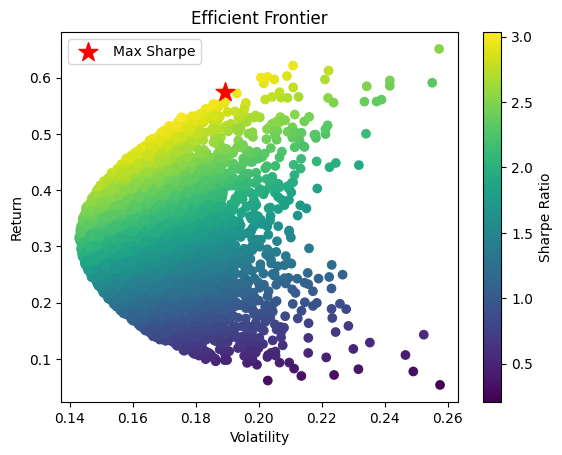

In [6]:
# Step 4: Efficient Frontier Plot
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Highlight Max Sharpe Portfolio
max_sharpe_idx = np.argmax(results[2, :])
print(f"Best weights: {all_weights[max_sharpe_idx]}, Best return: {results[0, max_sharpe_idx]}, Best volatility: {results[1, max_sharpe_idx]}")
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c='red', marker='*', s=200, label='Max Sharpe')
plt.legend()
plt.show()